# 第11章：時間序列分析

## 11.1 了解Python和Pandas日期工具的區別

In [2]:
import numpy as np
import pandas as pd

# pd.set_option('max_columns', 4, 'max_rows', 10,'max_colwidth', 12)

In [3]:
import datetime

date = datetime.date(year=2022, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(
  year=2022, month=6, day=7, hour=12, minute=30, second=19, microsecond=463198
)
print(f"date is {date}")

date is 2022-06-07


In [4]:
print(f"time is {time}")

time is 12:30:19.463198


In [5]:
print(f"datetime is {dt}")

datetime is 2022-06-07 12:30:19.463198


In [6]:
td = datetime.timedelta(
  weeks=2, days=5, hours=10, minutes=20, seconds=6.73, milliseconds=99, microseconds=8
)
td

datetime.timedelta(days=19, seconds=37206, microseconds=829008)

In [7]:
print(f"new date is {date+td}")

new date is 2022-06-26


In [8]:
print(f"new datetime is {dt+td}")

new datetime is 2022-06-26 22:50:26.292206


In [ ]:
# time + td

In [9]:
pd.Timestamp(year=2021, month=12, day=21, hour=5, minute=10, second=8, microsecond=99)

Timestamp('2021-12-21 05:10:08.000099')

In [10]:
pd.Timestamp("2016/1/10")

Timestamp('2016-01-10 00:00:00')

In [11]:
pd.Timestamp("2014-5/10")

Timestamp('2014-05-10 00:00:00')

In [12]:
pd.Timestamp("Jan 3, 2019 20:45.56")

Timestamp('2019-01-03 20:45:33')

In [13]:
pd.Timestamp("2016-01-05T05:34:43.123456789")

Timestamp('2016-01-05 05:34:43.123456789')

In [14]:
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [15]:
pd.Timestamp(5000, unit="D")

Timestamp('1983-09-10 00:00:00')

In [16]:
pd.to_datetime("2015-5-13")

Timestamp('2015-05-13 00:00:00')

In [17]:
pd.to_datetime("2015-13-5", dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [18]:
pd.to_datetime(
  "Start Date: Sep 30, 2017 Start Time: 1:30 pm",
  format="Start Date: %b %d, %Y Start Time: %I:%M %p",
)

Timestamp('2017-09-30 13:30:00')

In [19]:
pd.to_datetime(100, unit="D", origin="2013-1-1")

Timestamp('2013-04-11 00:00:00')

In [20]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit="D")

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [21]:
s = pd.Series(["12-5-2015", "14-1-2013", "20/12/2017", "40/23/2017"])
pd.to_datetime(s, dayfirst=True, errors="coerce")

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [22]:
pd.to_datetime(["Aug 3 1999 3:45:56", "10/31/2017"])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [23]:
pd.Timedelta("12 days 5 hours 3 minutes 123456789 nanoseconds")

Timedelta('12 days 05:03:00.123456789')

In [24]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [25]:
pd.Timedelta(100, unit="W")

Timedelta('700 days 00:00:00')

In [26]:
pd.to_timedelta("67:15:45.454")

Timedelta('2 days 19:15:45.454000')

In [27]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit="s")

0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]

In [28]:
time_strings = ["2 days 24 minutes 89.67 seconds", "00:45:23.6"]
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [29]:
pd.Timedelta("12 days 5 hours 3 minutes") * 2

Timedelta('24 days 10:06:00')

In [30]:
(pd.Timestamp("1/1/2022") + pd.Timedelta("12 days 5 hours 3 minutes") * 2)

Timestamp('2022-01-25 10:06:00')

In [31]:
td1 = pd.to_timedelta([10, 100], unit="s")
td2 = pd.to_timedelta(["3 hours", "4 hours"])
td1 + td2

TimedeltaIndex(['0 days 03:00:10', '0 days 04:01:40'], dtype='timedelta64[ns]', freq=None)

In [32]:
pd.Timedelta("12 days") / pd.Timedelta("3 days")

4.0

In [33]:
ts = pd.Timestamp("2021-10-1 4:23:23.9")
ts.ceil("h")

Timestamp('2021-10-01 05:00:00')

In [34]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2021, 10, 1, 4, 23, 23)

In [35]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(4, 274, 31)

In [36]:
ts.to_pydatetime()

datetime.datetime(2021, 10, 1, 4, 23, 23, 900000)

In [37]:
td = pd.Timedelta(125.8723, unit="h")
td

Timedelta('5 days 05:52:20.280000')

In [38]:
td.round("min")

Timedelta('5 days 05:52:00')

In [39]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [40]:
td.total_seconds()

453140.28

## 11.2 對時間序列切片

In [41]:
crime = pd.read_hdf("data/crime.h5", "crime")
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [42]:
mem_cat = crime.memory_usage().sum()
mem_obj = (
  crime.astype(
    {
      "OFFENSE_TYPE_ID": "object",
      "OFFENSE_CATEGORY_ID": "object",
      "NEIGHBORHOOD_ID": "object",
    }
  )
  .memory_usage(deep=True)
  .sum()
)
mb = 2 ** 20
round(mem_cat / mb, 1), round(mem_obj / mb, 1)

(22.9, 116.2)

In [43]:
crime = crime.set_index("REPORTED_DATE")
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...
2017-09-13 05:48:00,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [44]:
crime.index[:2]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

In [45]:
crime.loc["2016-05-12 16:45:00"]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [46]:
crime.loc["2016-05-12"]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [47]:
crime.loc["2016-05"].shape

(8012, 7)

In [48]:
crime.loc["2016"].shape

(91076, 7)

In [49]:
crime.loc["2016-05-12 03"].shape

(4, 7)

In [50]:
crime.loc["Dec 2015"].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [51]:
crime.loc["2016 Sep, 15"].shape

(252, 7)

In [52]:
crime.loc["21st October 2014 05"].shape

(4, 7)

In [53]:
crime.loc["2015-3-4":"2016-1-1"].sort_index()

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\929735105.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2015-3-4':'2016-1-1'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


In [54]:
crime.loc["2015-3-4 22":"2016-1-1 11:22:00"].sort_index()

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\2700549053.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2015-3-4 22':'2016-1-1 11:22:00'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045235,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 11:10:00,theft-of-motor-vehicle,auto-theft,-104.819450,39.791615,montbello,1,0
2016-01-01 11:11:00,traffic-accident,traffic-accident,-104.981701,39.736814,capitol-hill,0,1
2016-01-01 11:11:00,traffic-accident-hit-and-run,traffic-accident,-104.973731,39.714223,speer,0,1


In [55]:
%timeit crime.loc['2015-3-4':'2016-1-1']

<magic-timeit>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


13.6 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

1.4 ms ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 11.3 過濾包含時間資料的欄位

In [57]:
crime = pd.read_hdf("data/crime.h5", "crime")
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [58]:
(crime[crime.REPORTED_DATE == "2016-05-12 16:45:00"])

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [59]:
(crime[crime.REPORTED_DATE == "2016-05-12"])

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [60]:
(crime[crime.REPORTED_DATE.dt.date == "2016-05-12"])

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [61]:
(crime[crime.REPORTED_DATE.between(left="2016-05-12", right="2016-05-13")])

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
296474,liquor-possession,drug-alcohol,2016-05-12 18:40:00,-104.995692,39.747875,cbd,1,0
297204,traffic-accident,traffic-accident,2016-05-12 22:26:00,-104.880037,39.777037,stapleton,0,1
299383,theft-bicycle,larceny,2016-05-12 20:35:00,-104.929350,39.763797,northeast-park-hill,1,0
299389,theft-of-motor-vehicle,auto-theft,2016-05-12 09:39:00,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...,...
358208,public-peace-other,public-disorder,2016-05-12 17:55:00,-105.027747,39.700029,westwood,1,0
358448,threats-to-injure,public-disorder,2016-05-12 19:24:00,-104.947118,39.763777,clayton,1,0
363134,sex-aslt-rape,sexual-assault,2016-05-12 22:28:00,NaN,NaN,harvey-park-south,1,0
365959,menacing-felony-w-weap,aggravated-assault,2016-05-12 15:59:00,-104.935172,39.723703,hilltop,1,0


In [62]:
(crime[crime.REPORTED_DATE.between("2016-05", "2016-06")].shape)

(8012, 8)

In [63]:
(crime[crime.REPORTED_DATE.between("2016", "2017")].shape)

(91076, 8)

In [64]:
(crime[crime.REPORTED_DATE.between("2016-05-12 03", "2016-05-12 04")].shape)

(4, 8)

In [65]:
(crime[crime.REPORTED_DATE.between("2016 Sep, 15", "2016 Sep, 16")].shape)

(252, 8)

In [66]:
(
  crime[
    crime.REPORTED_DATE.between("21st October 2014 05", "21st October 2014 06")
  ].shape
)

(4, 8)

In [67]:
(crime[crime.REPORTED_DATE.between("2015-3-4 ", "2016-1-1 23:59:59")].shape)

(75403, 8)

In [68]:
(crime[crime.REPORTED_DATE.between("2015-3-4 22", "2016-1-1 11:22:00")].shape)

(75071, 8)

In [69]:
lmask = crime.REPORTED_DATE >= "2015-3-4 22"
rmask = crime.REPORTED_DATE <= "2016-1-1 11:22:00"
crime[lmask & rmask].shape

(75071, 8)

In [70]:
ctseries = crime.set_index("REPORTED_DATE")
%timeit ctseries.loc['2015-3-4':'2016-1-1']

<magic-timeit>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


13.4 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [71]:
%timeit crime[crime.REPORTED_DATE.between('2015-3-4','2016-1-1')]

12.6 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 11.4 僅適用於DatetimeIndex的方法

In [72]:
crime = pd.read_hdf("data/crime.h5", "crime").set_index("REPORTED_DATE")
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [75]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [76]:
crime.columns

Index(['OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'GEO_LON', 'GEO_LAT',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [77]:
crime.dtypes

OFFENSE_TYPE_ID        category
OFFENSE_CATEGORY_ID    category
GEO_LON                 float64
GEO_LAT                 float64
NEIGHBORHOOD_ID        category
IS_CRIME                  int64
IS_TRAFFIC                int64
dtype: object

In [73]:
crime.between_time("2:00", "5:00", include_end=False)

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\581884243.py:1: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  crime.between_time('2:00', '5:00', include_end=False)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [74]:
import datetime

crime.between_time(datetime.time(2, 0), datetime.time(5, 0), include_end=False)

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\1164802990.py:2: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  crime.between_time(datetime.time(2,0), datetime.time(5,0), include_end=False)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [78]:
crime.at_time("5:47")

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [79]:
crime_sort = crime.sort_index()
crime_sort.first(offset=pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [80]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-29 23:01:00,aggravated-assault,aggravated-assault,-105.019673,39.733250,sun-valley,1,0
2012-06-29 23:11:00,traffic-accident,traffic-accident,-104.918451,39.653080,southmoor-park,0,1
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0


In [81]:
first_date = crime_sort.index[0]
first_date

Timestamp('2012-01-02 00:06:00')

In [82]:
first_date + pd.offsets.MonthBegin(6)

Timestamp('2012-07-01 00:06:00')

In [83]:
first_date + pd.offsets.MonthEnd(6)

Timestamp('2012-06-30 00:06:00')

In [84]:
step4 = crime_sort.first(pd.offsets.MonthEnd(6))
end_dt = crime_sort.index[0] + pd.offsets.MonthEnd(6)
step4_internal = crime_sort[:end_dt]
step4.equals(step4_internal)

True

In [85]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [86]:
crime_sort.loc[:"2012-06"]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [87]:
crime_sort.first("5D")

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0


In [88]:
crime_sort.first("5B")

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-05 22:27:00,criminal-mischief-graffiti,public-disorder,-104.981969,39.739094,capitol-hill,1,0
2012-01-05 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.969107,39.733848,cheesman-park,0,1
2012-01-05 23:40:00,harassment,public-disorder,-104.962264,39.681313,university,1,0


In [89]:
crime_sort.first("7W")

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,-104.974663,39.744041,north-capitol-hill,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1


In [90]:
crime_sort.first("3QS")

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,-105.022715,39.678579,college-view-south-platte,1,0
2012-09-30 23:29:00,robbery-street,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0


In [91]:
crime_sort.first("A")

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960898,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


In [92]:
dt = pd.Timestamp("2012-1-16 13:40")
dt + pd.DateOffset(months=1)

Timestamp('2012-02-16 13:40:00')

In [93]:
do = pd.DateOffset(years=2, months=5, days=3, hours=8, seconds=10)
pd.Timestamp("2012-1-22 03:22") + do

Timestamp('2014-06-25 11:22:10')

## 11.5 依據時間區段重新分組

In [94]:
crime_sort = (
  pd.read_hdf("data/crime.h5", "crime").set_index("REPORTED_DATE").sort_index()
)

In [95]:
crime_sort.resample("W")

In [96]:
(crime_sort.resample("W").size())

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [97]:
len(crime_sort.loc[:"2012-1-8"])

877

In [98]:
len(crime_sort.loc["2012-1-9":"2012-1-15"])

1071

In [99]:
(crime_sort.resample("W-THU").size())

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [100]:
weekly_crimes = crime_sort.groupby(pd.Grouper(freq="W")).size()
weekly_crimes

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [101]:
r = crime_sort.resample("W")
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'binner',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groupby',
 'groups',
 'indices',
 'interpolate',
 'kind',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'ohlc',
 'pad',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

In [102]:
crime = pd.read_hdf("data/crime.h5", "crime")
weekly_crimes2 = crime.resample("W", on="REPORTED_DATE").size()
weekly_crimes2.equals(weekly_crimes)

True

In [103]:
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key="REPORTED_DATE", freq="W")).size()
weekly_crimes2.equals(weekly_crimes)

True

<AxesSubplot:title={'center':'All Denver Crimes'}, xlabel='REPORTED_DATE'>

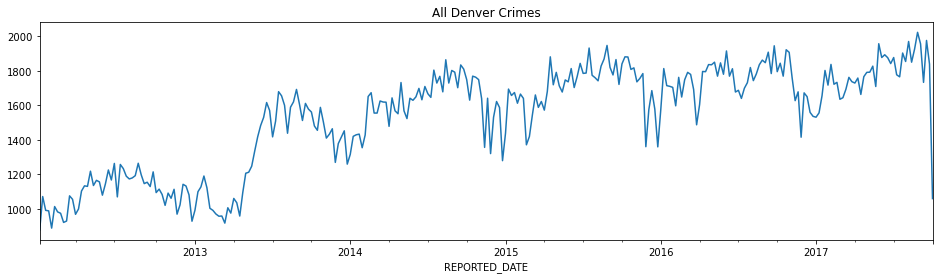

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 4))
weekly_crimes.plot(title="All Denver Crimes", ax=ax)

## 11.6 分組彙總同一時間單位的多個欄位

In [105]:
crime = pd.read_hdf("data/crime.h5", "crime").set_index("REPORTED_DATE").sort_index()

In [106]:
(crime.resample("Q")["IS_CRIME", "IS_TRAFFIC"].sum())

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


In [107]:
(crime.resample("QS")["IS_CRIME", "IS_TRAFFIC"].sum())

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
2013-04-01,12259,4510
2013-07-01,15799,4942
2013-10-01,13910,4968
2014-01-01,14487,5021


In [111]:
(crime.loc["2012-4-1":"2012-6-30", ["IS_CRIME", "IS_TRAFFIC"]].sum())

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [109]:
(crime.groupby(pd.Grouper(freq="Q"))["IS_CRIME", "IS_TRAFFIC"].sum())

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\186917459.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (crime


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\33321396.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (crime


<AxesSubplot:title={'center':'Denver Crimes and Traffic Accidents'}, xlabel='REPORTED_DATE'>

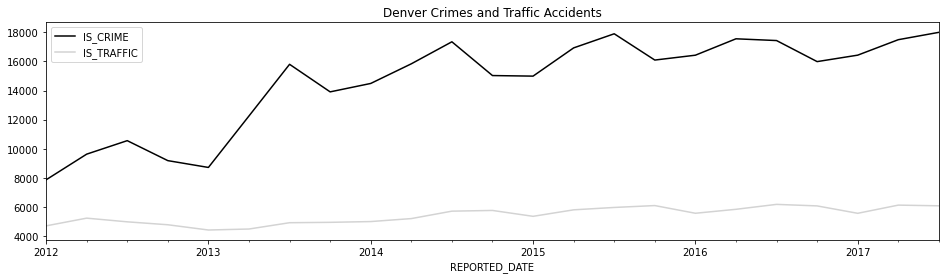

In [112]:
fig, ax = plt.subplots(figsize=(16, 4))
(
  crime.groupby(pd.Grouper(freq="Q"))["IS_CRIME", "IS_TRAFFIC"]
  .sum()
  .plot(
    color=["black", "lightgrey"], ax=ax, title="Denver Crimes and Traffic Accidents"
  )
)

In [113]:
(crime.resample("Q").sum())

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442
2013-06-30,-1.745258e+06,660605.459423,12259,4510
2013-09-30,-2.163462e+06,818928.385016,15799,4942
2013-12-31,-1.968499e+06,745130.512956,13910,4968
2014-03-31,-2.035280e+06,770390.547678,14487,5021


In [114]:
(crime_sort.resample("QS-MAR")["IS_CRIME", "IS_TRAFFIC"].sum())

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2011-12-01,5013,3198
2012-03-01,9260,4954
2012-06-01,10524,5190
2012-09-01,9450,4777
2012-12-01,9003,4652
2013-03-01,9953,4461
2013-06-01,15792,4797
2013-09-01,14588,4915
2013-12-01,13538,5030


In [115]:
crime_begin = crime.resample("Q")["IS_CRIME", "IS_TRAFFIC"].sum().iloc[0]

<AxesSubplot:title={'center':'Denver Crimes and Traffic Accidents % Increase'}, xlabel='REPORTED_DATE'>

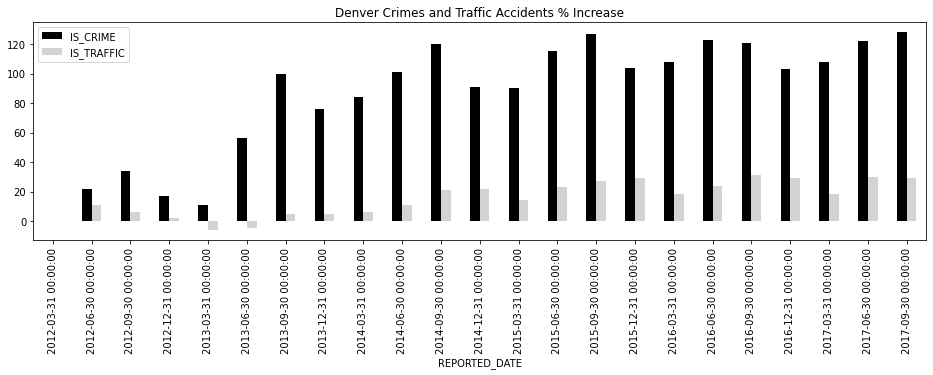

In [116]:
fig, ax = plt.subplots(figsize=(16, 4))
(
  crime.resample("Q")["IS_CRIME", "IS_TRAFFIC"]
  .sum()
  .div(crime_begin)
  .sub(1)
  .round(2)
  .mul(100)
  .plot.bar(
    color=["black", "lightgrey"],
    ax=ax,
    title="Denver Crimes and Traffic Accidents % Increase",
  )
)

## 11.7 案例演練：以『星期幾』來統計犯罪率

In [117]:
crime = pd.read_hdf("data/crime.h5", "crime")
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [118]:
(crime["REPORTED_DATE"].dt.day_name().value_counts())

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

<AxesSubplot:title={'center':'Denver Crimes and Traffic Accidents per Weekday'}>

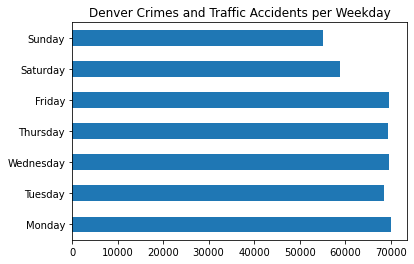

In [119]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
title = "Denver Crimes and Traffic Accidents per Weekday"
fig, ax = plt.subplots(figsize=(6, 4))
(
  crime["REPORTED_DATE"]
  .dt.day_name()
  .value_counts()
  .reindex(days)
  .plot.barh(title=title, ax=ax)
)

In [120]:
(crime["REPORTED_DATE"].dt.day_name().value_counts().loc[days])

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

<AxesSubplot:title={'center':'Denver Crimes and Traffic Accidents per Year'}>

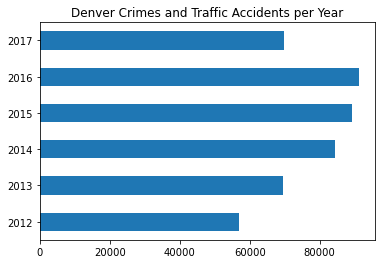

In [121]:
title = "Denver Crimes and Traffic Accidents per Year"
fig, ax = plt.subplots(figsize=(6, 4))
(
  crime["REPORTED_DATE"]
  .dt.year.value_counts()
  .sort_index()
  .plot.barh(title=title, ax=ax)
)

In [122]:
(
  crime.groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  ).size()
)

year  day      
2012  Friday        8549
      Monday        8786
      Saturday      7442
      Sunday        7189
      Thursday      8440
      Tuesday       8191
      Wednesday     8440
2013  Friday       10380
      Monday       10627
      Saturday      8875
      Sunday        8444
      Thursday     10431
      Tuesday      10416
      Wednesday    10354
2014  Friday       12683
      Monday       12813
      Saturday     10950
      Sunday       10278
      Thursday     12309
      Tuesday      12440
      Wednesday    12948
2015  Friday       13273
      Monday       13452
      Saturday     11586
      Sunday       10624
      Thursday     13512
      Tuesday      13381
      Wednesday    13320
2016  Friday       14059
      Monday       13708
      Saturday     11467
      Sunday       10554
      Thursday     14050
      Tuesday      13338
      Wednesday    13900
2017  Friday       10677
      Monday       10638
      Saturday      8514
      Sunday        8124
      Thu

In [123]:
(
  crime.groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  )
  .size()
  .unstack("day")
)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [124]:
(
  crime.assign(
    year=crime.REPORTED_DATE.dt.year, day=crime.REPORTED_DATE.dt.day_name()
  ).pipe(lambda df_: pd.crosstab(df_.year, df_.day))
)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [125]:
criteria = crime["REPORTED_DATE"].dt.year == 2017
crime.loc[criteria, "REPORTED_DATE"].dt.dayofyear.max()

272

In [126]:
crime_pct = (
  crime["REPORTED_DATE"]
  .dt.dayofyear.le(272)
  .groupby(crime.REPORTED_DATE.dt.year)
  .mean()
  .round(3)
)

crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [127]:
crime_pct.loc[2012:2016].median()

0.748

In [128]:
def update_2017(df_):
  df_.loc[2017] = df_.loc[2017].div(0.748).astype("int")
  return df_


(
  crime.groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  )
  .size()
  .unstack("day")
  .pipe(update_2017)
  .reindex(columns=days)
)

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


<AxesSubplot:xlabel='day', ylabel='year'>

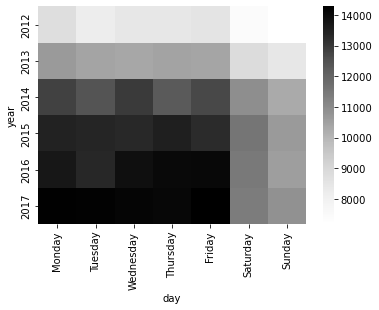

In [129]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
table = (
  crime.groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  )
  .size()
  .unstack("day")
  .pipe(update_2017)
  .reindex(columns=days)
)
sns.heatmap(table, cmap="Greys", ax=ax)

In [135]:
denver_pop = pd.read_csv("data/denver_pop.csv", index_col="Year")
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [136]:
den_100k = denver_pop.div(100_000).squeeze()
den_100k

Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64

In [137]:
(
  crime.groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  )
  .size()
  .unstack("day")
  .pipe(update_2017)
  .reindex(columns=days)
) / den_100k

,2012,2013,2014,2015,2016,2017,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
den_100k = denver_pop.div(100_000).squeeze()
normalized = (
  crime.groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  )
  .size()
  .unstack("day")
  .pipe(update_2017)
  .reindex(columns=days)
  .div(den_100k, axis="index")
  .astype(int)
)
normalized

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


<AxesSubplot:xlabel='day'>

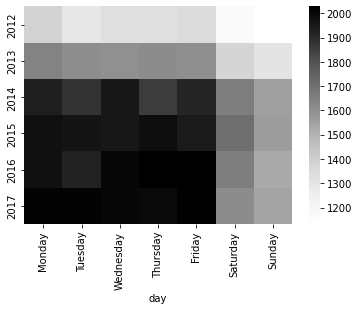

In [139]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(normalized, cmap="Greys", ax=ax)

In [140]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_type = "auto-theft"
normalized = (
  crime.query("OFFENSE_CATEGORY_ID == @crime_type")
  .groupby(
    [
      crime["REPORTED_DATE"].dt.year.rename("year"),
      crime["REPORTED_DATE"].dt.day_name().rename("day"),
    ]
  )
  .size()
  .unstack("day")
  .pipe(update_2017)
  .reindex(columns=days)
  .div(den_100k, axis="index")
  .astype(int)
)
normalized

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


## 11.8 使用匿名函式來分組

In [141]:
crime = pd.read_hdf("data/crime.h5", "crime").set_index("REPORTED_DATE").sort_index()

In [142]:
common_attrs = set(dir(crime.index)) & set(dir(pd.Timestamp))
[attr for attr in common_attrs if attr[0] != "_"]

['day_name',
 'max',
 'normalize',
 'tz_localize',
 'to_julian_date',
 'day_of_week',
 'is_month_start',
 'resolution',
 'ceil',
 'floor',
 'to_period',
 'daysinmonth',
 'month_name',
 'is_quarter_start',
 'quarter',
 'microsecond',
 'weekofyear',
 'tz',
 'month',
 'tz_convert',
 'timetz',
 'weekday',
 'days_in_month',
 'time',
 'nanosecond',
 'min',
 'is_quarter_end',
 'dayofyear',
 'day_of_year',
 'year',
 'day',
 'to_numpy',
 'round',
 'hour',
 'isocalendar',
 'is_month_end',
 'minute',
 'dayofweek',
 'to_pydatetime',
 'week',
 'is_year_end',
 'is_year_start',
 'tzinfo',
 'freq',
 'second',
 'strftime',
 'date',
 'freqstr',
 'is_leap_year']

In [143]:
crime.index.day_name().value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [144]:
(crime.groupby(lambda idx: idx.day_name())["IS_CRIME", "IS_TRAFFIC"].sum())

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\2092093496.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (crime


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [145]:
funcs = [lambda idx: idx.round("2h").hour, lambda idx: idx.year]
(crime.groupby(funcs)["IS_CRIME", "IS_TRAFFIC"].sum().unstack())

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\942505586.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (crime


IS_CRIME                               IS_TRAFFIC              \
REPORTED_DATE     2012  2013  2014  2015  2016  2017       2012  2013  2014   
REPORTED_DATE                                                                 
0                 2422  4040  5649  5649  5377  3811        919   792   978   
2                 1888  3214  4245  4050  4091  3041        718   652   779   
4                 1472  2181  2956  2959  3044  2255        399   378   424   
6                 1067  1365  1750  2167  2108  1567        411   399   479   
8                 2998  3445  3727  4161  4488  3251       1957  1955  2210   
10                4305  5035  5658  6205  6218  4993       1979  1901  2139   
12                4496  5524  6434  6841  7226  5463       2200  2138  2379   
14                4266  5698  6708  7218  6896  5396       2241  2245  2630   
16                4113  5889  7351  7643  7926  6338       2714  2562  3002   
18                3660  5094  6586  7015  7407  6157       3118  2704  3217   
20                3521  4895  6130  6360  6963  5272       1787  1806  1994   
22                3078  4318  5496  5626  5637  4358       1343  1330  1532   

                                 
REPORTED_DATE  2015  2016  2017  
REPORTED_DATE                    
0              1136   980   782  
2               773   718   537  
4               471   464   313  
6               494   593   462  
8              2331  2372  1828  
10             2320  2303  1873  
12             2631  2760  1986  
14             2840  2763  1990  
16             3160  3527  2784  
18             3412  3608  2718  
20             2071  2184  1491  
22             1671  1472  1072

In [146]:
funcs = [lambda idx: idx.round("2h").hour, lambda idx: idx.year]
(
  crime.groupby(funcs)["IS_CRIME", "IS_TRAFFIC"]
  .sum()
  .unstack()
  .style.highlight_max(color="lightgrey")
)

C:\Users\aaronhsu\AppData\Local\Temp\ipykernel_24768\1047784382.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (crime


## 11.9 使用Timestamp與另一欄位來分組

In [150]:
employee = pd.read_csv(
  "data/employee.csv", parse_dates=["JOB_DATE", "HIRE_DATE"], index_col="HIRE_DATE"
)
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22
...,...,...,...,...,...,...,...,...,...
2014-06-09,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2015-06-09
2003-09-02,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2013-10-06
2014-10-13,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2015-10-13


In [151]:
(employee.groupby("GENDER")["BASE_SALARY"].mean().round(-2))

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [152]:
(employee.resample("10AS")["BASE_SALARY"].mean().round(-2))

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [153]:
(employee.groupby("GENDER").resample("10AS")["BASE_SALARY"].mean().round(-2))

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [154]:
(
  employee.groupby("GENDER")
  .resample("10AS")["BASE_SALARY"]
  .mean()
  .round(-2)
  .unstack("GENDER")
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


In [155]:
employee[employee["GENDER"] == "Male"].index.min()

Timestamp('1958-12-29 00:00:00')

In [156]:
employee[employee["GENDER"] == "Female"].index.min()

Timestamp('1975-06-09 00:00:00')

In [158]:
(
  employee.groupby(["GENDER", pd.Grouper(freq="10AS")])["BASE_SALARY"]
  .mean()
  .round(-2)
  .unstack("GENDER")
 )

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [157]:
(employee.groupby(["GENDER", pd.Grouper(freq="10AS")])["BASE_SALARY"].mean().round(-2))

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [159]:
sal_final = (
  employee.groupby(["GENDER", pd.Grouper(freq="10AS")])["BASE_SALARY"]
  .mean()
  .round(-2)
  .unstack("GENDER")
)
years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + "-" + years_right.astype(str)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


In [160]:
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

<IntervalArray>
[(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]]
Length: 5, dtype: interval[float64, right]

In [161]:
(employee.groupby([cuts, "GENDER"])["BASE_SALARY"].mean().unstack("GENDER").round(-2))

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


In [1]:
print('Done!')

Done!
